## Load the data

In [109]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer # type of feature_extraction
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
Cleaned_train = pd.read_csv('/content/cleaned_x_train.csv')
Cleaned_test = pd.read_csv('/content/cleaned_x_test.csv')
Cleaned_val = pd.read_csv('/content/cleaned_x_valid.csv')

In [4]:
Cleaned_val.columns=['cleaned_x_train','y_train']
Cleaned_val

,cleaned_x_train,y_train
0,داك شي لي كان غدى يكون لولا تدخل بعض الصفحات و...,3
1,انا تحت امرك زيادبس هيكون يوم ايه,0
2,لا زعيمة ولا حاجة دانا وبقول للحيطة داريني بتس...,0
3,يا ابراهيم مريم منزلتش مصر قبل كده ولا مشت في ...,0
4,فهمتوا حاجه من كلامه؟,2
...,...,...
29539,بالبوازيك يا أستاذ محمد,0
29540,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
29541,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
29542,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [ ]:
Cleaned_train = pd.concat([Cleaned_train, Cleaned_val], ignore_index=True)
Cleaned_train

,cleaned_x_train,y_train
0,اي خبر او تطور من جل الديب حدا يدقلي ما بفتحلو...,1
1,الشي الوحيد المنيح اللي عملو جورج وسوف بحياته ...,1
2,معلهش معلش معلهش معلهش معلهش معلهش معلهش معلهش...,0
3,اول ما خذا البطاقة جا في بالي اياب اليوفي يارب...,2
4,انا صرت نازلة شي خمس مرات من يوم ما نشهرت المل...,1
...,...,...
118169,بالبوازيك يا أستاذ محمد,0
118170,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
118171,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
118172,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [5]:
import warnings
warnings.filterwarnings("ignore")

### Report method to see our model


# Model Evaluation Report
 A function to evaluate a machine learning model's performance.
 - The function computes training and testing accuracies
 - generates a classification report
 -  displays a confusion matrix using a heatmap.


In [34]:
def report(model, X_train, y_train, X_test, y_test):
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Train acc: {train_acc}')
    print(f'Test acc: {test_acc}')

    predictions = model.predict(X_test)
    cr = classification_report(y_test, predictions)
    print(cr)

    cm = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    plt.show()

### Text_fit_predict_without_imbalanced method to fit our model with orignal processed data

# Model Training and Evaluation without Handling Imbalanced Data

This function  train and evaluate a machine learning model on original data without addressing class imbalance.
- The function fits the model on the training data and evaluates its performance on both the training and testing datasets.


In [33]:
# this method to fit our orignal data
def text_fit_predict_without_Handling_imbalanced(X_train, X_test, y_train, y_test, model_model):

  model = model_model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model

# Model Training and Evaluation with Handling Imbalanced Data

A function to train and evaluate a machine learning model after applying resampling techniques.
-  The function fits the model on the resampled training data and evaluates its performance on both the training and testing datasets

In [31]:
def text_fit_predict_with_oversampling(X_train, X_test, y_train, y_test, model_model, re_sample):

  print('features: {}'.format(X_train.shape[1]))

  os =  re_sample  #  RandomOverSampler
  #  Using RandomOverSampler which supports sparse matrices instead of SMOTE for oversampling is better coz SMOTE doesn't directly support sparse matrices.
  X_res, y_res = os.fit_resample(X_train, y_train)
  print(f'resample: {X_res.shape, y_res.shape}')

  model=model_model.fit(X_res, y_res)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model

In [14]:
cntVec = CountVectorizer()
X_train_c = cntVec.fit_transform(Cleaned_train['cleaned_x_train'])  # fit X_train only
X_test_c = cntVec.transform(Cleaned_test['cleaned_x_test'])  # transform X_test

In [32]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(Cleaned_train['cleaned_x_train'])  # fit X_train only
X_test_tfidf = tfidf.transform(Cleaned_test['cleaned_x_test']) # transform X_test

In [43]:
model_cntVec_without_handling_imbalance = text_fit_predict_without_Handling_imbalanced(X_train_c, X_test_c,
                                                                                Cleaned_train['y_train'], Cleaned_test['y_test'],
                                                                                LogisticRegression(solver='sag'))

Train acc: 0.8825679792395351
Test acc: 0.8065258597346331


### Using pipline

# Pipeline with CountVectorizer and LogisticRegression

- This code segment demonstrates the creation of a pipeline with `CountVectorizer` and `LogisticRegression` for text classification.

In [ ]:
# Step 1: Initialize CountVectorizer
cntVec = CountVectorizer()

# Step 2: Create a pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('count_vectorizer', cntVec),
    ('logistic_regression', LogisticRegression(solver='sag'))
])

# Step 3: Fit the pipeline on the training data and predict on the testing data
pipeline.fit(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
predictions = pipeline.predict(Cleaned_test['cleaned_x_test'])

# Evaluate the model
train_acc = pipeline.score(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
test_acc = pipeline.score(Cleaned_test['cleaned_x_test'], Cleaned_test['y_test'])
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')

Train acc: 0.8832252712837094
Test acc: 0.8141062540209257


Train acc: 0.8825679792395351
Test acc: 0.8065258597346331
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     11470
           1       0.84      0.81      0.82      5636
           2       0.75      0.81      0.78      7269
           3       0.87      0.60      0.71      2330
           4       0.85      0.56      0.67      2839

    accuracy                           0.81     29544
   macro avg       0.82      0.74      0.77     29544
weighted avg       0.81      0.81      0.80     29544



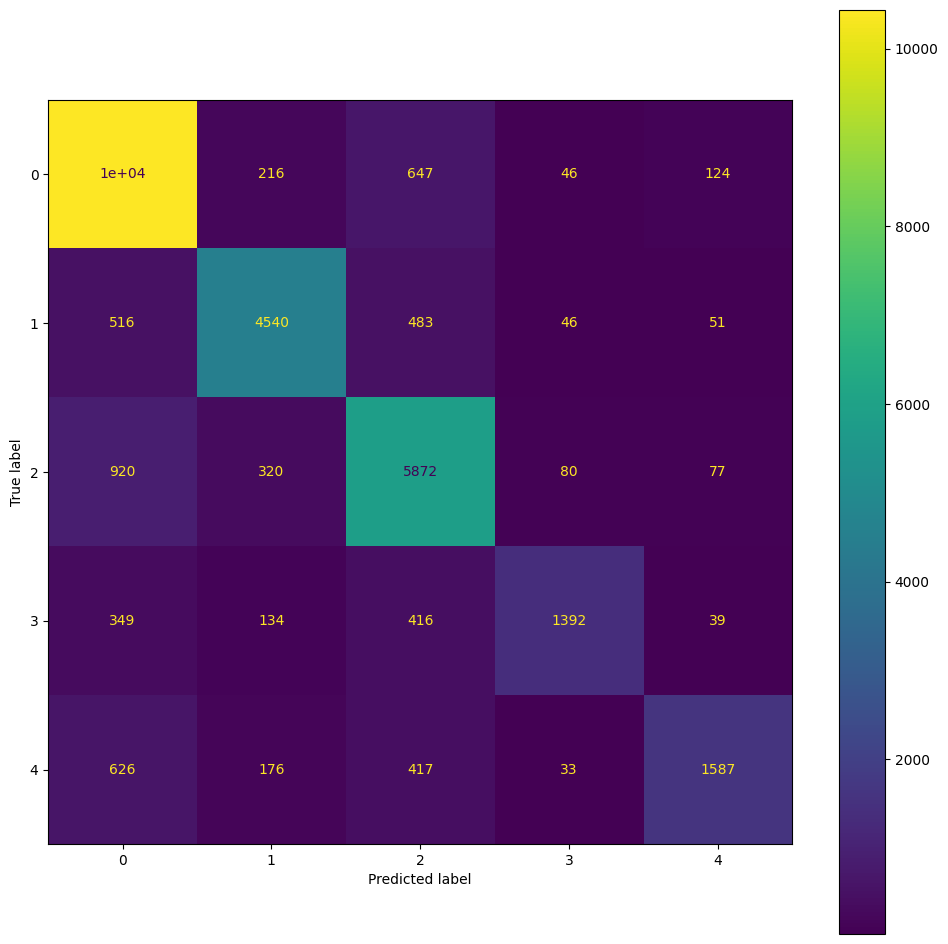

In [44]:
report(model_cntVec_without_handling_imbalance, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

In [38]:
# Use tfidf
model_tfidf_without_handling_imbalance = text_fit_predict_without_Handling_imbalanced(X_train_tfidf, X_test_tfidf,
                                                                                      Cleaned_train['y_train'], Cleaned_test['y_test'],
                                                                                      LogisticRegression(solver='sag'))

Train acc: 0.9112264470269661
Test acc: 0.814378554021121


Train acc: 0.9112264470269661
Test acc: 0.814378554021121
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     11470
           1       0.86      0.82      0.84      5636
           2       0.77      0.81      0.79      7269
           3       0.90      0.59      0.71      2330
           4       0.85      0.55      0.67      2839

    accuracy                           0.81     29544
   macro avg       0.84      0.74      0.77     29544
weighted avg       0.82      0.81      0.81     29544



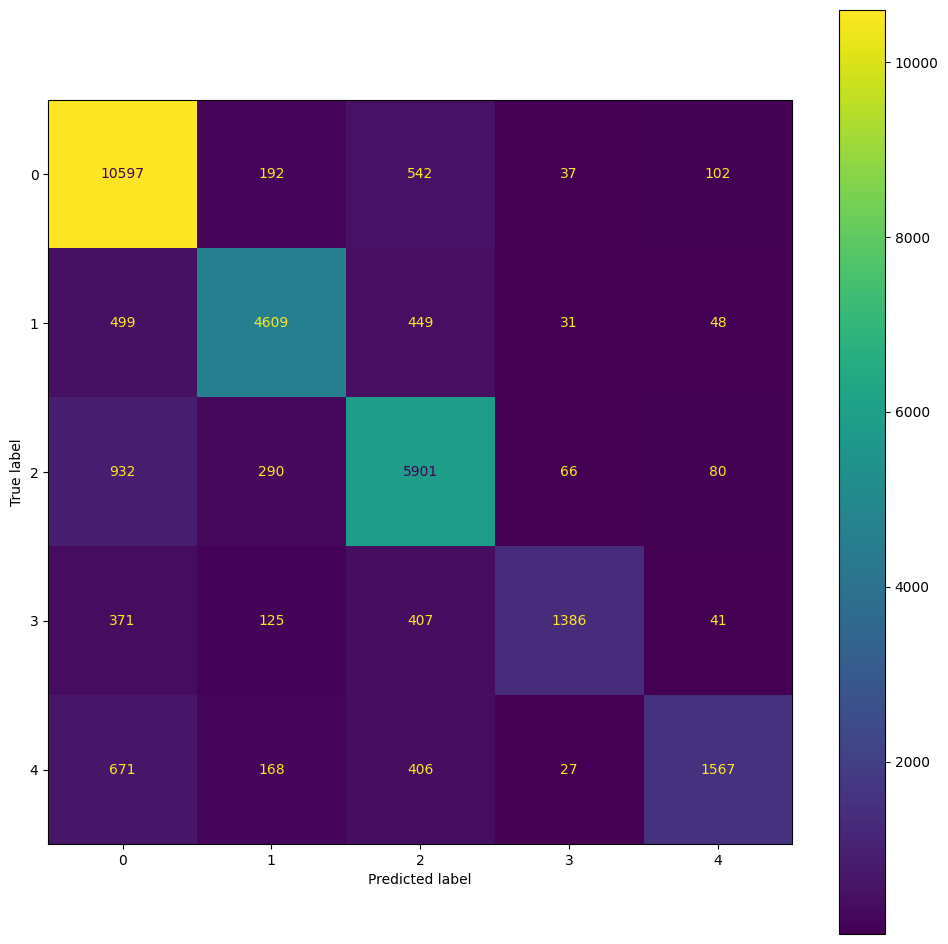

In [39]:
report(model_tfidf_without_handling_imbalance, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

# Label Mapping

Manually created label mapping for the classes:

| Class Index | Class Label |
|-------------|-------------|
| 0           | EG          |
| 1           | LB          |
| 2           | LY          |
| 3           | MA          |
| 4           | SD          |


In [ ]:
# Manually create the label mapping
class_labels = ['EG', 'LB', 'LY', 'MA', 'SD']
label_mapping = {index: label for index, label in enumerate(class_labels)}
inverse_label_mapping = {label: index for index, label in label_mapping.items()}
print(f'Label mapping: {label_mapping}')

Label mapping: {0: 'EG', 1: 'LB', 2: 'LY', 3: 'MA', 4: 'SD'}


# Test Prediction

In [ ]:
# Test with a new string
test_string = ["الفانله البيضا بخطين حمر "]
test_string_c = cntVec.transform(test_string)
test_prediction = model_cntVec_without_handling_imbalance.predict(test_string_c)
test_prediction_label = [label_mapping[pred] for pred in test_prediction]
print(f'Test prediction for the new string (encoded): {test_prediction}')
print(f'Test prediction for the new string (original label): {test_prediction_label}')

Test prediction for the new string (encoded): [0]
Test prediction for the new string (original label): ['EG']


# Model Training and Prediction

- Using Logistic Regression with the 'sag' solver and Random OverSampler for handling imbalanced classes.

In [40]:
model_with_oversampling = text_fit_predict_with_oversampling(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), RandomOverSampler())

features: 178044
resample: ((173415, 178044), (173415,))
Train acc: 0.9105607582082816
Test acc: 0.7992485783915516


# Model Evaluation Report

Train acc: 0.9091178412418953
Test acc: 0.8076727728303931
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11468
           1       0.82      0.85      0.83      5636
           2       0.79      0.80      0.79      7266
           3       0.69      0.73      0.71      2330
           4       0.64      0.71      0.67      2833

    accuracy                           0.81     29533
   macro avg       0.77      0.79      0.77     29533
weighted avg       0.81      0.81      0.81     29533



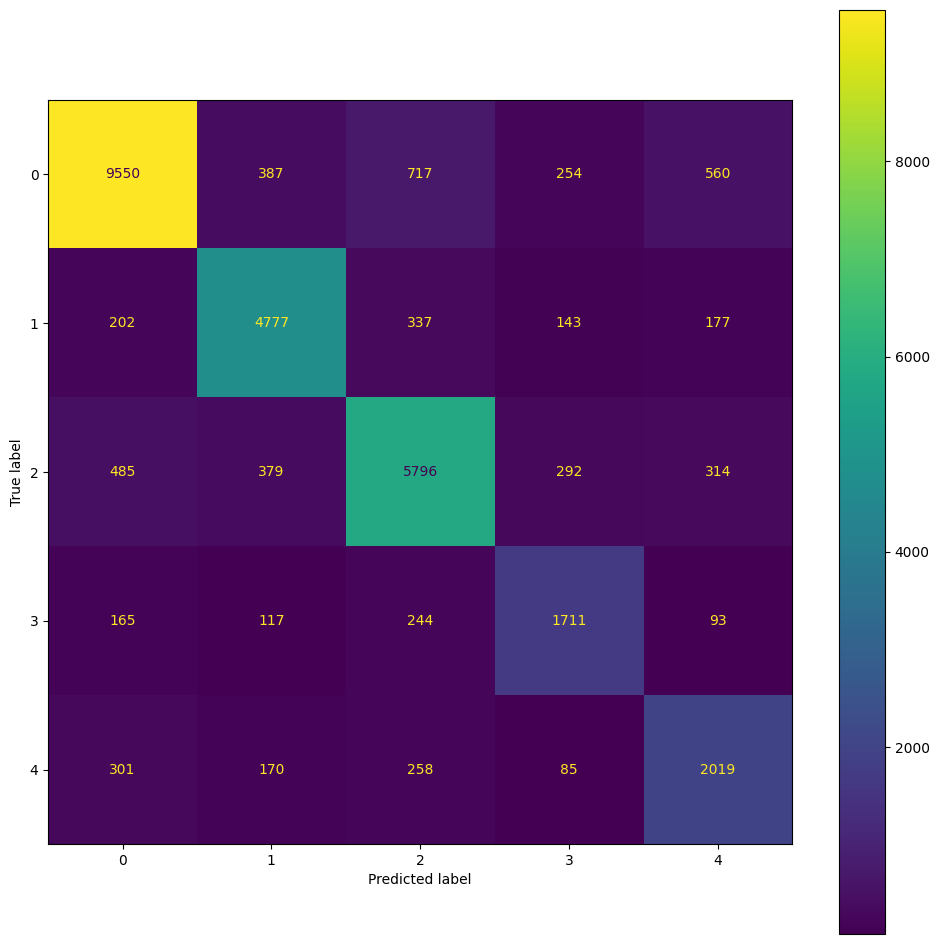

In [ ]:
report(model_with_oversampling, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

# Grid Search for Hyperparameter Tuning

- Performing hyperparameter tuning using Grid Search with cross-validation.


In [ ]:
# for Oversampling
grid={'C':10.0 **np.arange(-2,3),'max_iter':[500]}

os =  RandomOverSampler()
X_res, y_res = os.fit_resample(X_train_tfidf, Cleaned_train['y_train'])  # fit resample data

log_model = LogisticRegression(solver='sag')
clf = GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_res, y_res )

GridSearchCV(cv=5, estimator=LogisticRegression(solver='sag'), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'max_iter': [500]},
             scoring='f1_macro')

# Model Evaluation Report

Train acc: 0.991853838414008
Test acc: 0.7922093367893637
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     11468
           1       0.85      0.85      0.85      5636
           2       0.81      0.81      0.81      7266
           3       0.76      0.72      0.74      2330
           4       0.70      0.69      0.69      2833

    accuracy                           0.83     29533
   macro avg       0.80      0.79      0.79     29533
weighted avg       0.83      0.83      0.83     29533



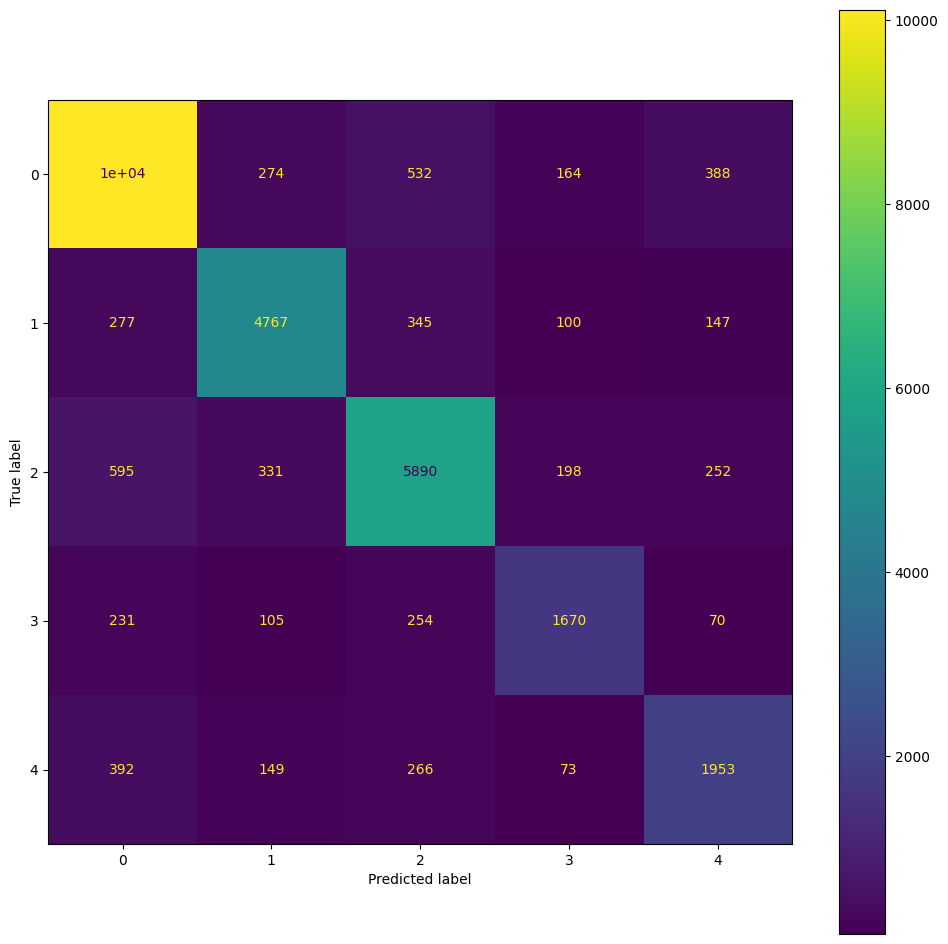

In [ ]:
report(clf, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])  # Best Macro f1 Score

# Using Undersampling for handling imbalanced data

In [8]:
def text_fit_predict_with_undersampling(X_train, X_test, y_train, y_test, model_model, re_sample):

    print('features: {}'.format(X_train.shape[1]))

    # Perform undersampling
    us = re_sample
    X_res, y_res = us.fit_resample(X_train, y_train)
    print(f'resampled shape: {X_res.shape, y_res.shape}')

    # Fit the model on the resampled data
    model = model_model.fit(X_res, y_res)

    # Evaluate model accuracy on the original train and test sets
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Train accuracy: {train_acc}')
    print(f'Test accuracy: {test_acc}')

    return model

# Model Training and Prediction

- Using Logistic Regression with the 'sag' solver and Random UnderSampler for handling imbalanced classes.

In [45]:
model_with_undersampling = text_fit_predict_with_undersampling(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), RandomUnderSampler())

features: 178044
resampled shape: ((34595, 178044), (34595,))
Train accuracy: 0.7992327654293129
Test accuracy: 0.7439412401841321


Train acc: 0.7992327654293129
Test acc: 0.7439412401841321
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     11470
           1       0.77      0.80      0.79      5636
           2       0.73      0.72      0.73      7269
           3       0.54      0.75      0.63      2330
           4       0.52      0.69      0.60      2839

    accuracy                           0.74     29544
   macro avg       0.69      0.74      0.71     29544
weighted avg       0.77      0.74      0.75     29544



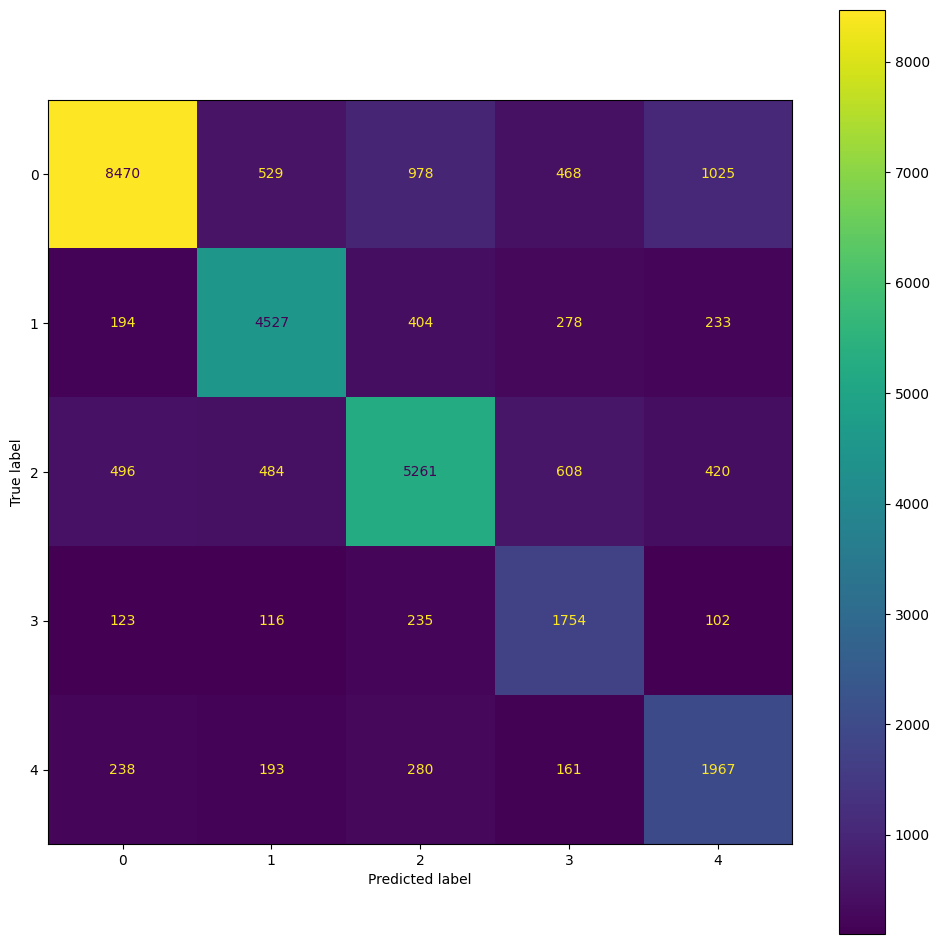

In [46]:
report(model_with_undersampling, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

# Grid Search for Hyperparameter Tuning

- Performing hyperparameter tuning using Grid Search with cross-validation.

In [47]:
# for UnderSampling
grid={'C':10.0 **np.arange(-2,3),'max_iter':[500]}

us =  RandomUnderSampler()
X_res, y_res = us.fit_resample(X_train_tfidf, Cleaned_train['y_train'])  # fit resample data

log_model = LogisticRegression(solver='sag')
clf = GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_res, y_res )

GridSearchCV(cv=5, estimator=LogisticRegression(solver='sag'), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'max_iter': [500]},
             scoring='f1_macro')

Train acc: 0.8529988949217971
Test acc: 0.7381217079956864
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     11470
           1       0.80      0.82      0.81      5636
           2       0.78      0.74      0.76      7269
           3       0.59      0.76      0.67      2330
           4       0.54      0.74      0.62      2839

    accuracy                           0.77     29544
   macro avg       0.72      0.77      0.74     29544
weighted avg       0.79      0.77      0.78     29544



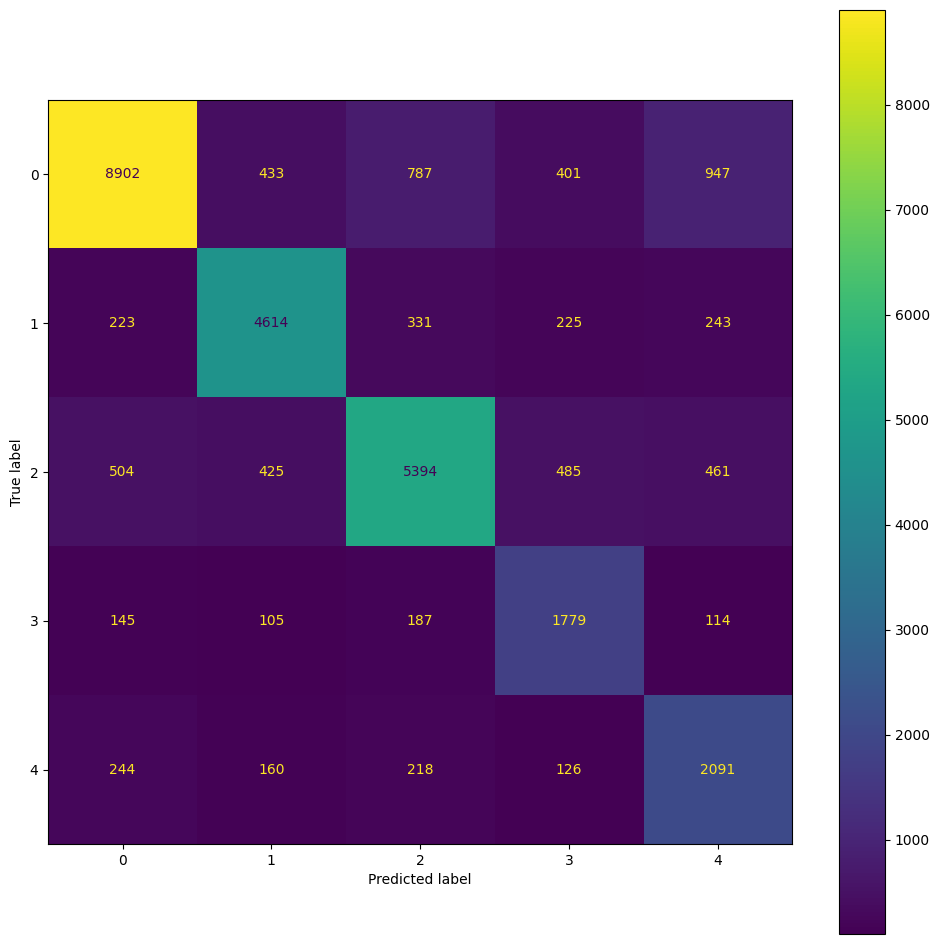

In [48]:
report(clf, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])
# 0.74 because the bigger class is 57635 and the smaller class is 11534 so there is huge information loss so undersampling is not best technique here

# Naive Bayes classifier

In [117]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_c, Cleaned_train['y_train'])

MultinomialNB()

In [118]:
y_pred = nb_classifier.predict(X_test_c)

In [119]:
# Evaluate the model using F1 score
f1 = f1_score(Cleaned_test['y_test'], y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 0.7738740668306786


In [120]:
print("Classification Report:\n", classification_report(Cleaned_test['y_test'], y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86     11470
           1       0.90      0.84      0.87      5636
           2       0.82      0.80      0.81      7269
           3       0.97      0.56      0.71      2330
           4       0.94      0.46      0.62      2839

    accuracy                           0.82     29544
   macro avg       0.88      0.73      0.77     29544
weighted avg       0.84      0.82      0.81     29544



------------

# Deep learning models

In [50]:
x_train_padded = pd.read_csv('/content/x_train_padded.csv')
x_test_padded = pd.read_csv('/content/x_test_padded.csv')
x_valid_padded = pd.read_csv('/content/x_valid_padded.csv')

In [ ]:
x_train_padded

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88625,1.0,814.0,5546.0,6.0,187673.0,34096.0,187674.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88626,1325.0,36990.0,16060.0,41664.0,32033.0,7.0,3412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88627,132.0,519.0,66358.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88628,108.0,131.0,566.0,34933.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Renaming Columns

- Renaming the columns of the DataFrame `x_valid_padded`.

In [51]:
x_valid_padded.columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'y_train']

In [52]:
padded_train = pd.concat([x_train_padded, x_valid_padded], ignore_index=True)
padded_train

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169,7.0,3287.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118170,18803.0,3340.0,723.0,166.0,86.0,4.0,291.0,3678.0,15.0,14230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118171,18.0,65.0,42923.0,36.0,12117.0,138.0,377.0,14367.0,87.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118172,21.0,1814.0,1002.0,1971.0,1814.0,26.0,48199.0,2274.0,18.0,130672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [54]:
Unique_Words=187345
input_length=50
EMBEDDING_DIM=100

##  LSTM Model

- Define a Keras model using Sequential API and compile it with custom metrics.

In [80]:
# we should make a function for f1 score because it isn't exist in keras
import tensorflow as tf
from tensorflow.keras import backend as K

# Function for recall calculation
def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is float32
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Function for precision calculation
def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is float32
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Function for F1 score calculation
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [81]:
# Define your Keras model
model = Sequential()
model.add(Embedding(Unique_Words, EMBEDDING_DIM, input_length=input_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Compile your Keras model with custom metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_m])

# Print model summary
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_5                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [82]:
X_train=padded_train.drop('y_train',axis=1)
y_train=padded_train['y_train']

In [83]:
y_train

,y_train
0,1
1,1
2,0
3,2
4,1
...,...
118169,0
118170,0
118171,0
118172,2


In [84]:
X_test=x_test_padded.drop('y_test',axis=1)
y_test=x_test_padded['y_test']

Training Keras Model

- Training the Keras model with specified epochs and batch size.

In [85]:
epochs = 10
batch_size = 64
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=1, min_delta=0.0001)])

Epoch 1/10
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 442s 117ms/step - f1_m: 2.8411 - loss: 1.4589 - val_f1_m: 1.7143 - val_loss: 1.3753
Epoch 2/10
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 417s 112ms/step - f1_m: 1.6567 - loss: 1.1854 - val_f1_m: 0.9942 - val_loss: 0.5316
Epoch 3/10
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 418s 105ms/step - f1_m: 0.9363 - loss: 0.3825 - val_f1_m: 0.9198 - val_loss: 0.4757
Epoch 4/10
3693/3693 ━━━━━━━━━━━━━━━━━━━━ 445s 106ms/step - f1_m: 0.8295 - loss: 0.1792 - val_f1_m: 0.8899 - val_loss: 0.5092


Evaluate Keras Model

- Evaluate the trained Keras model on the test set.
- And This is the best Model until now

In [89]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  f1 score: {:0.3f}'.format(accr[0],accr[1]))

924/924 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - f1_m: 0.8828 - loss: 0.5102
Test set
  Loss: 0.509
  f1 score: 0.890


Generate Classification Report

- Generate the classification report

In [88]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

924/924 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11470
           1       0.86      0.85      0.85      5636
           2       0.81      0.82      0.81      7269
           3       0.81      0.70      0.75      2330
           4       0.73      0.69      0.71      2839

    accuracy                           0.84     29544
   macro avg       0.81      0.79      0.80     29544
weighted avg       0.83      0.84      0.83     29544



In [90]:
y_test.shape,y_pred.shape

((29544,), (29544,))

Plot Training and Validation Metrics

- Visualize the training and validation accuracy and loss values over epochs.

In [93]:
print(history.history.keys())

dict_keys(['f1_m', 'loss', 'val_f1_m', 'val_loss'])


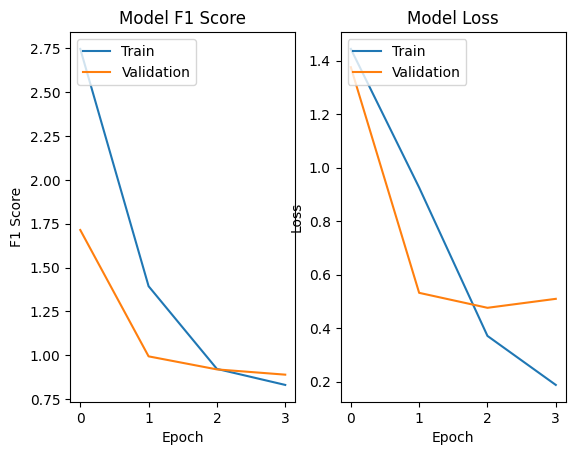

In [94]:
plt.subplot(1, 2, 1)
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.show()

# GRU

In [95]:
# Define the GRU model creation function with dropout
def create_gru_model(vocab_size, max_sequence_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_len))

    # Add GRU with Dropout to prevent overfitting
    model.add(GRU(units=128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))

    # Output layer
    model.add(Dense(5, activation='softmax'))

    # Compile the model with custom metrics and optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_m])
    return model

In [97]:
VOCAB_SIZE = 187686
max_sequence_len = 50

In [100]:
# Create the GRU model instance
gru_model = create_gru_model(VOCAB_SIZE, max_sequence_len)
gru_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Define callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
# Train the model
history = gru_model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping])

Epoch 1/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 266s 142ms/step - f1_m: 2.8791 - loss: 1.4614 - val_f1_m: 3.3240 - val_loss: 1.4543
Epoch 2/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 302s 132ms/step - f1_m: 2.9701 - loss: 1.4584 - val_f1_m: 2.5205 - val_loss: 1.4534
Epoch 3/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 272s 137ms/step - f1_m: 2.8683 - loss: 1.4572 - val_f1_m: 2.5199 - val_loss: 1.4548


In [104]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

924/924 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11470
           1       0.86      0.85      0.85      5636
           2       0.81      0.82      0.81      7269
           3       0.81      0.70      0.75      2330
           4       0.73      0.69      0.71      2839

    accuracy                           0.84     29544
   macro avg       0.81      0.79      0.80     29544
weighted avg       0.83      0.84      0.83     29544



# Save models using pickle

# Save Best Model

Save the best model (`clf`) using pickle.

In [ ]:
"""
Logistic Regression >> 0.79
LSTM >> 0.80 but it consumed a lot of time and computational power
GRU >> 0.80 but it consumed a lot of time and computational power

So we should use Logistic Regression because there are no big difference betweem it and deep learning models
"""

In [ ]:
import pickle
filename = 'clf.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'TfidfVectorizer.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'CountVectorizer.pkl'
pickle.dump(clf, open(filename, 'wb'))